## Project Description 
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
### Columns Description-  total 43 columns
#### Seat No : The enrolled number of candidate that took the exams
#### CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

##### Predict - CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Assignment_06DEC23\Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


### Observations:
- Can observe 571 rows and 43 columns

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

- No null values found
- However, many columns data are not uniform, will check the missing values.

In [6]:
# Check missing values in specific columns
for i in df.columns:
    print(i)
    print('\n')
    print(df[i].isnull().sum())

Seat No.


0
PH-121


0
HS-101


0
CY-105


1
HS-105/12


1
MT-111


2
CS-105


0
CS-106


2
EL-102


2
EE-119


2
ME-107


2
CS-107


2
HS-205/20


5
MT-222


5
EE-222


7
MT-224


7
CS-210


7
CS-211


5
CS-203


5
CS-214


6
EE-217


6
CS-212


6
CS-215


6
MT-331


9
EF-303


10
HS-304


10
CS-301


10
CS-302


10
TC-383


10
MT-442


10
EL-332


9
CS-318


9
CS-306


9
CS-312


10
CS-317


12
CS-403


12
CS-421


12
CS-406


85
CS-414


13
CS-419


13
CS-423


14
CS-412


79
CGPA


0


- confirmed many missing values in each columns
- will deal with the same

In [7]:
## Filling missing value with mode method, as all features are object data
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

- Confirmed non null value found

In [9]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

- No null value found

In [10]:
## Check unique values in all columns with non-graphical methods
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

In [11]:
## Checking the unique values in each column
df.nunique().to_frame('Number of unique values')

,Number of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


### Observation:
- Its confirmed Seat number column contains 571 unique values which is aligned with total number of rows. Hence, same can be dropped.

In [12]:
## Drop column (Id number)
df = df.drop('Seat No.', axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


## Observations:
- After removing column (Seat No.) shape is 571 rows and 42 columns
- Rest all are categorical dataset will check the distribution for the same.
- Except CGPA column, as same is target variable which is discrete data.

In [13]:
## Check duplicate value
df1 = df[df.duplicated()]
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


- No duplicate row found

In [14]:
## Separate categorical and numerical columns
categor_col = []
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categor_col.append(i)        
    else:
        numerical_col.append(i)
print('Categorical column = ', categor_col)
print('Numerical column = ', numerical_col)

Categorical column =  ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
Numerical column =  ['CGPA']


- Its confirmed all features are categorical data
- Except CGPA which is numerical data and target variable too

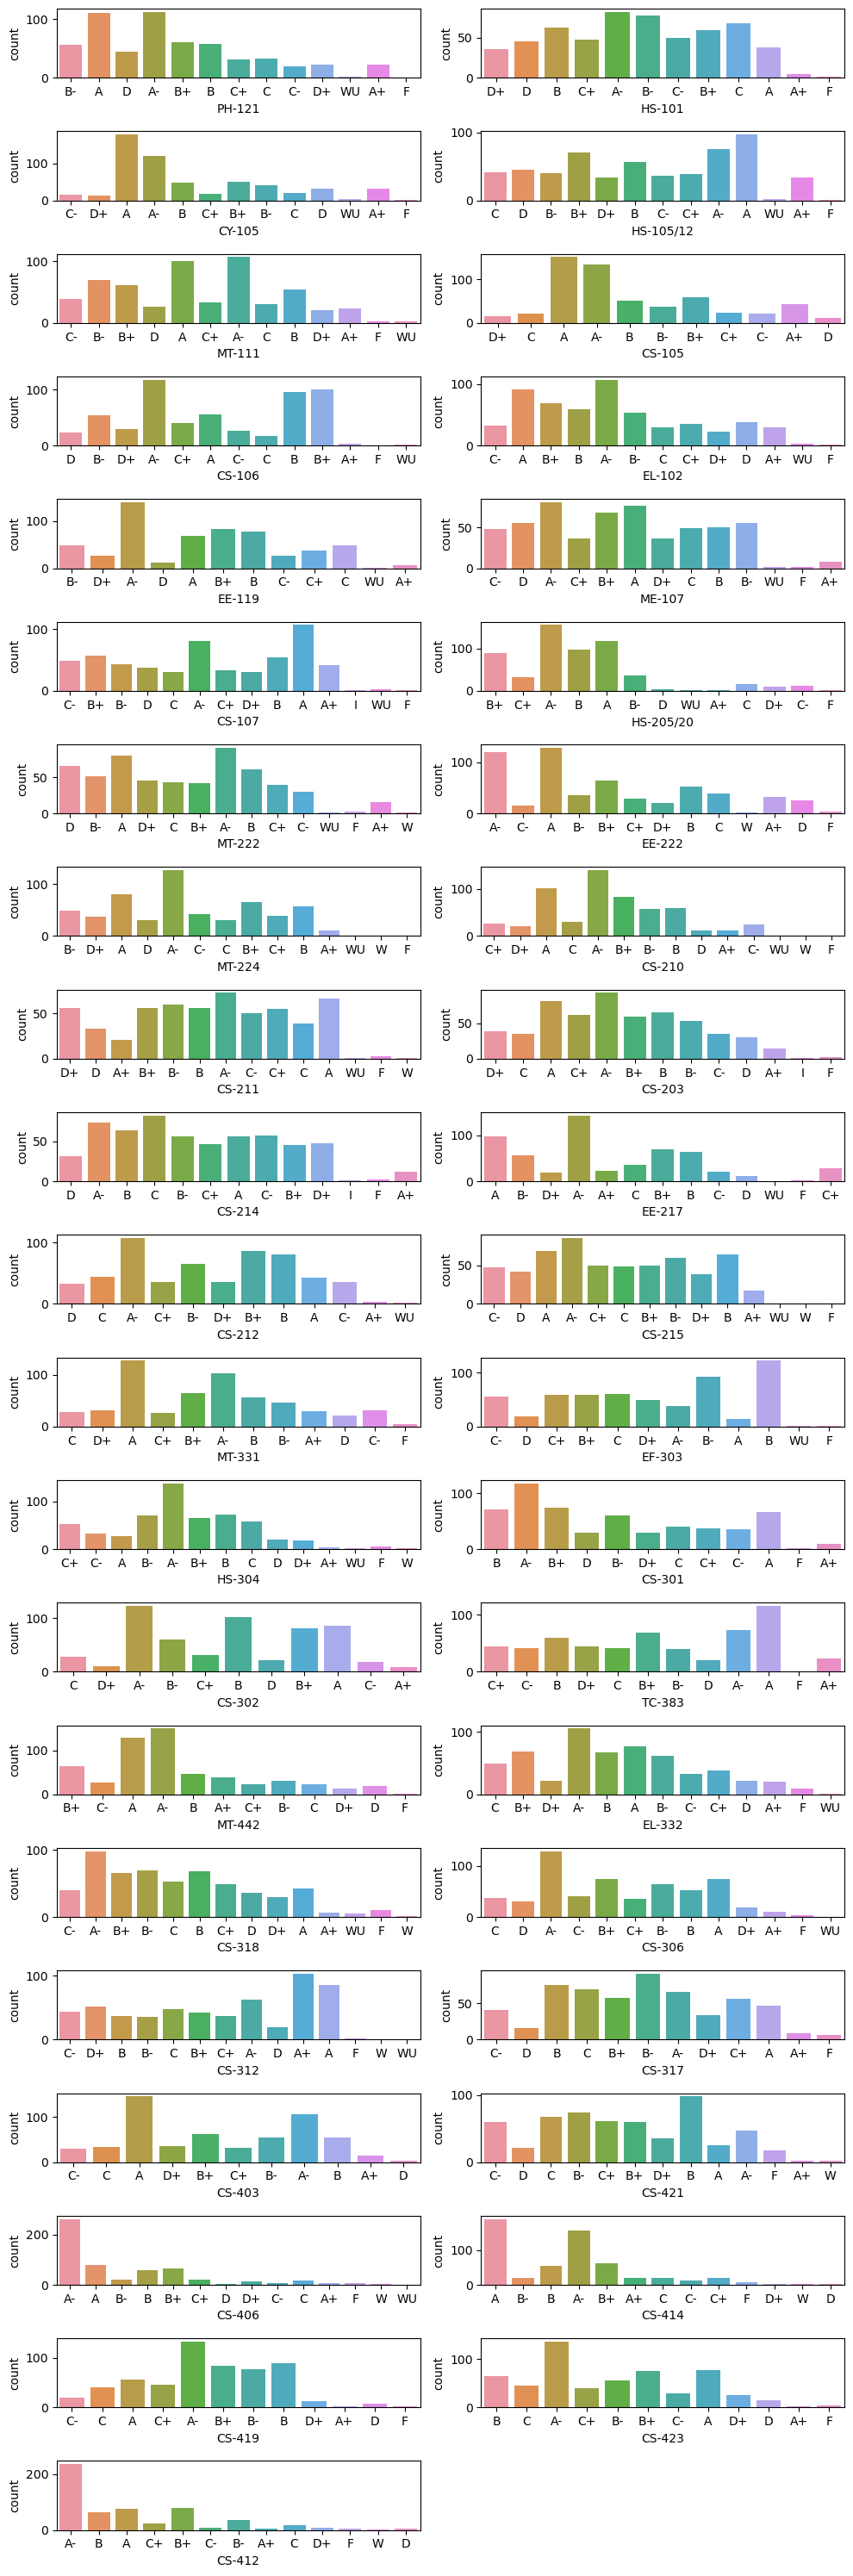

In [15]:
## Check distribution of data in all columns
plotnumber = 1
plt.figure(figsize = (10, 30))
for col in categor_col:         
    if plotnumber <=41:
        plt.subplot(21, 2, plotnumber)
        sns.countplot(df[col])
        plt.xlabel(col, fontsize = 10)
    plotnumber+=1  
plt.tight_layout()

- gradewise distribution of data in each column 

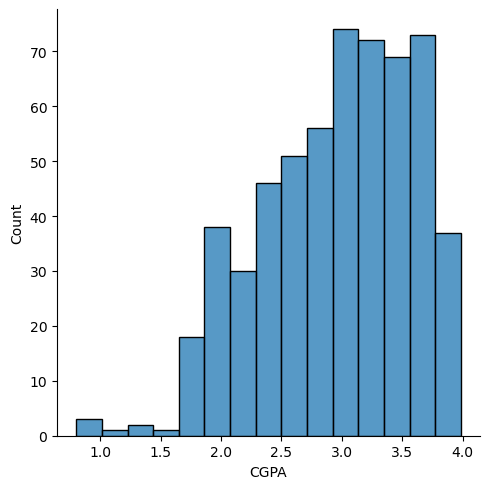

In [16]:
sns.displot(data=df, x='CGPA')

- It shows most of the data between 2.0 and 4.0

## Using Encoder on categorical columns

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


- Can see all categorical columns convert to numerical columns

In [18]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


### Osbervations:
- No null values found
- Can see right and left skwedness, will get more clarity with skew method. However, all of them are categorical columns
- Standard deviation also found inside categorical column
- Outliers also found inside categorical column

In [19]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

### Observation:
- Right skewdness in most of the columns, however those are catgeorical data, hence will not remove the same.

In [20]:
## Divide dataset into features and target variable
x = df.drop(['CGPA'],axis=1)
y = df.CGPA

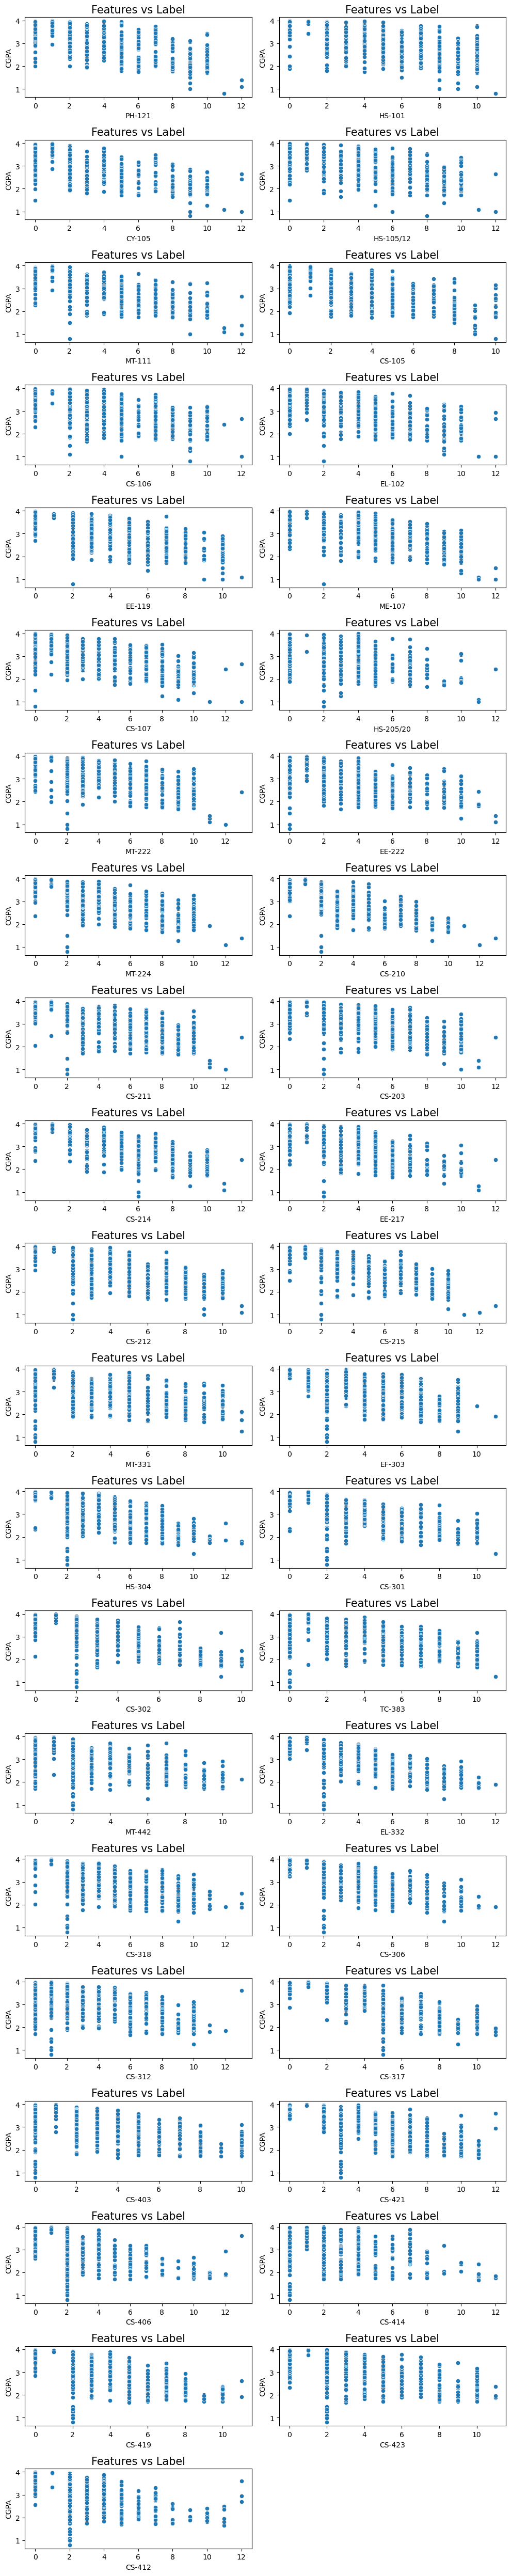

In [21]:
plotnumber = 1
plt.figure(figsize = (10, 50))
for i in x.columns:
    if plotnumber <=42:
        plt.subplot(21, 2, plotnumber)
        sns.scatterplot(x=i, y=y, data=df)
        plt.xlabel(i, fontsize = 10)
        plt.ylabel('CGPA', fontsize = 10)
        plt.title('Features vs Label', fontsize = 15)
    plotnumber+=1 
plt.tight_layout()

- No relation seen between features and label

In [22]:
corr = df.corr()
corr

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


- Will do the graphical presentation with heatmap to have more clarity on the analysis

<AxesSubplot:>

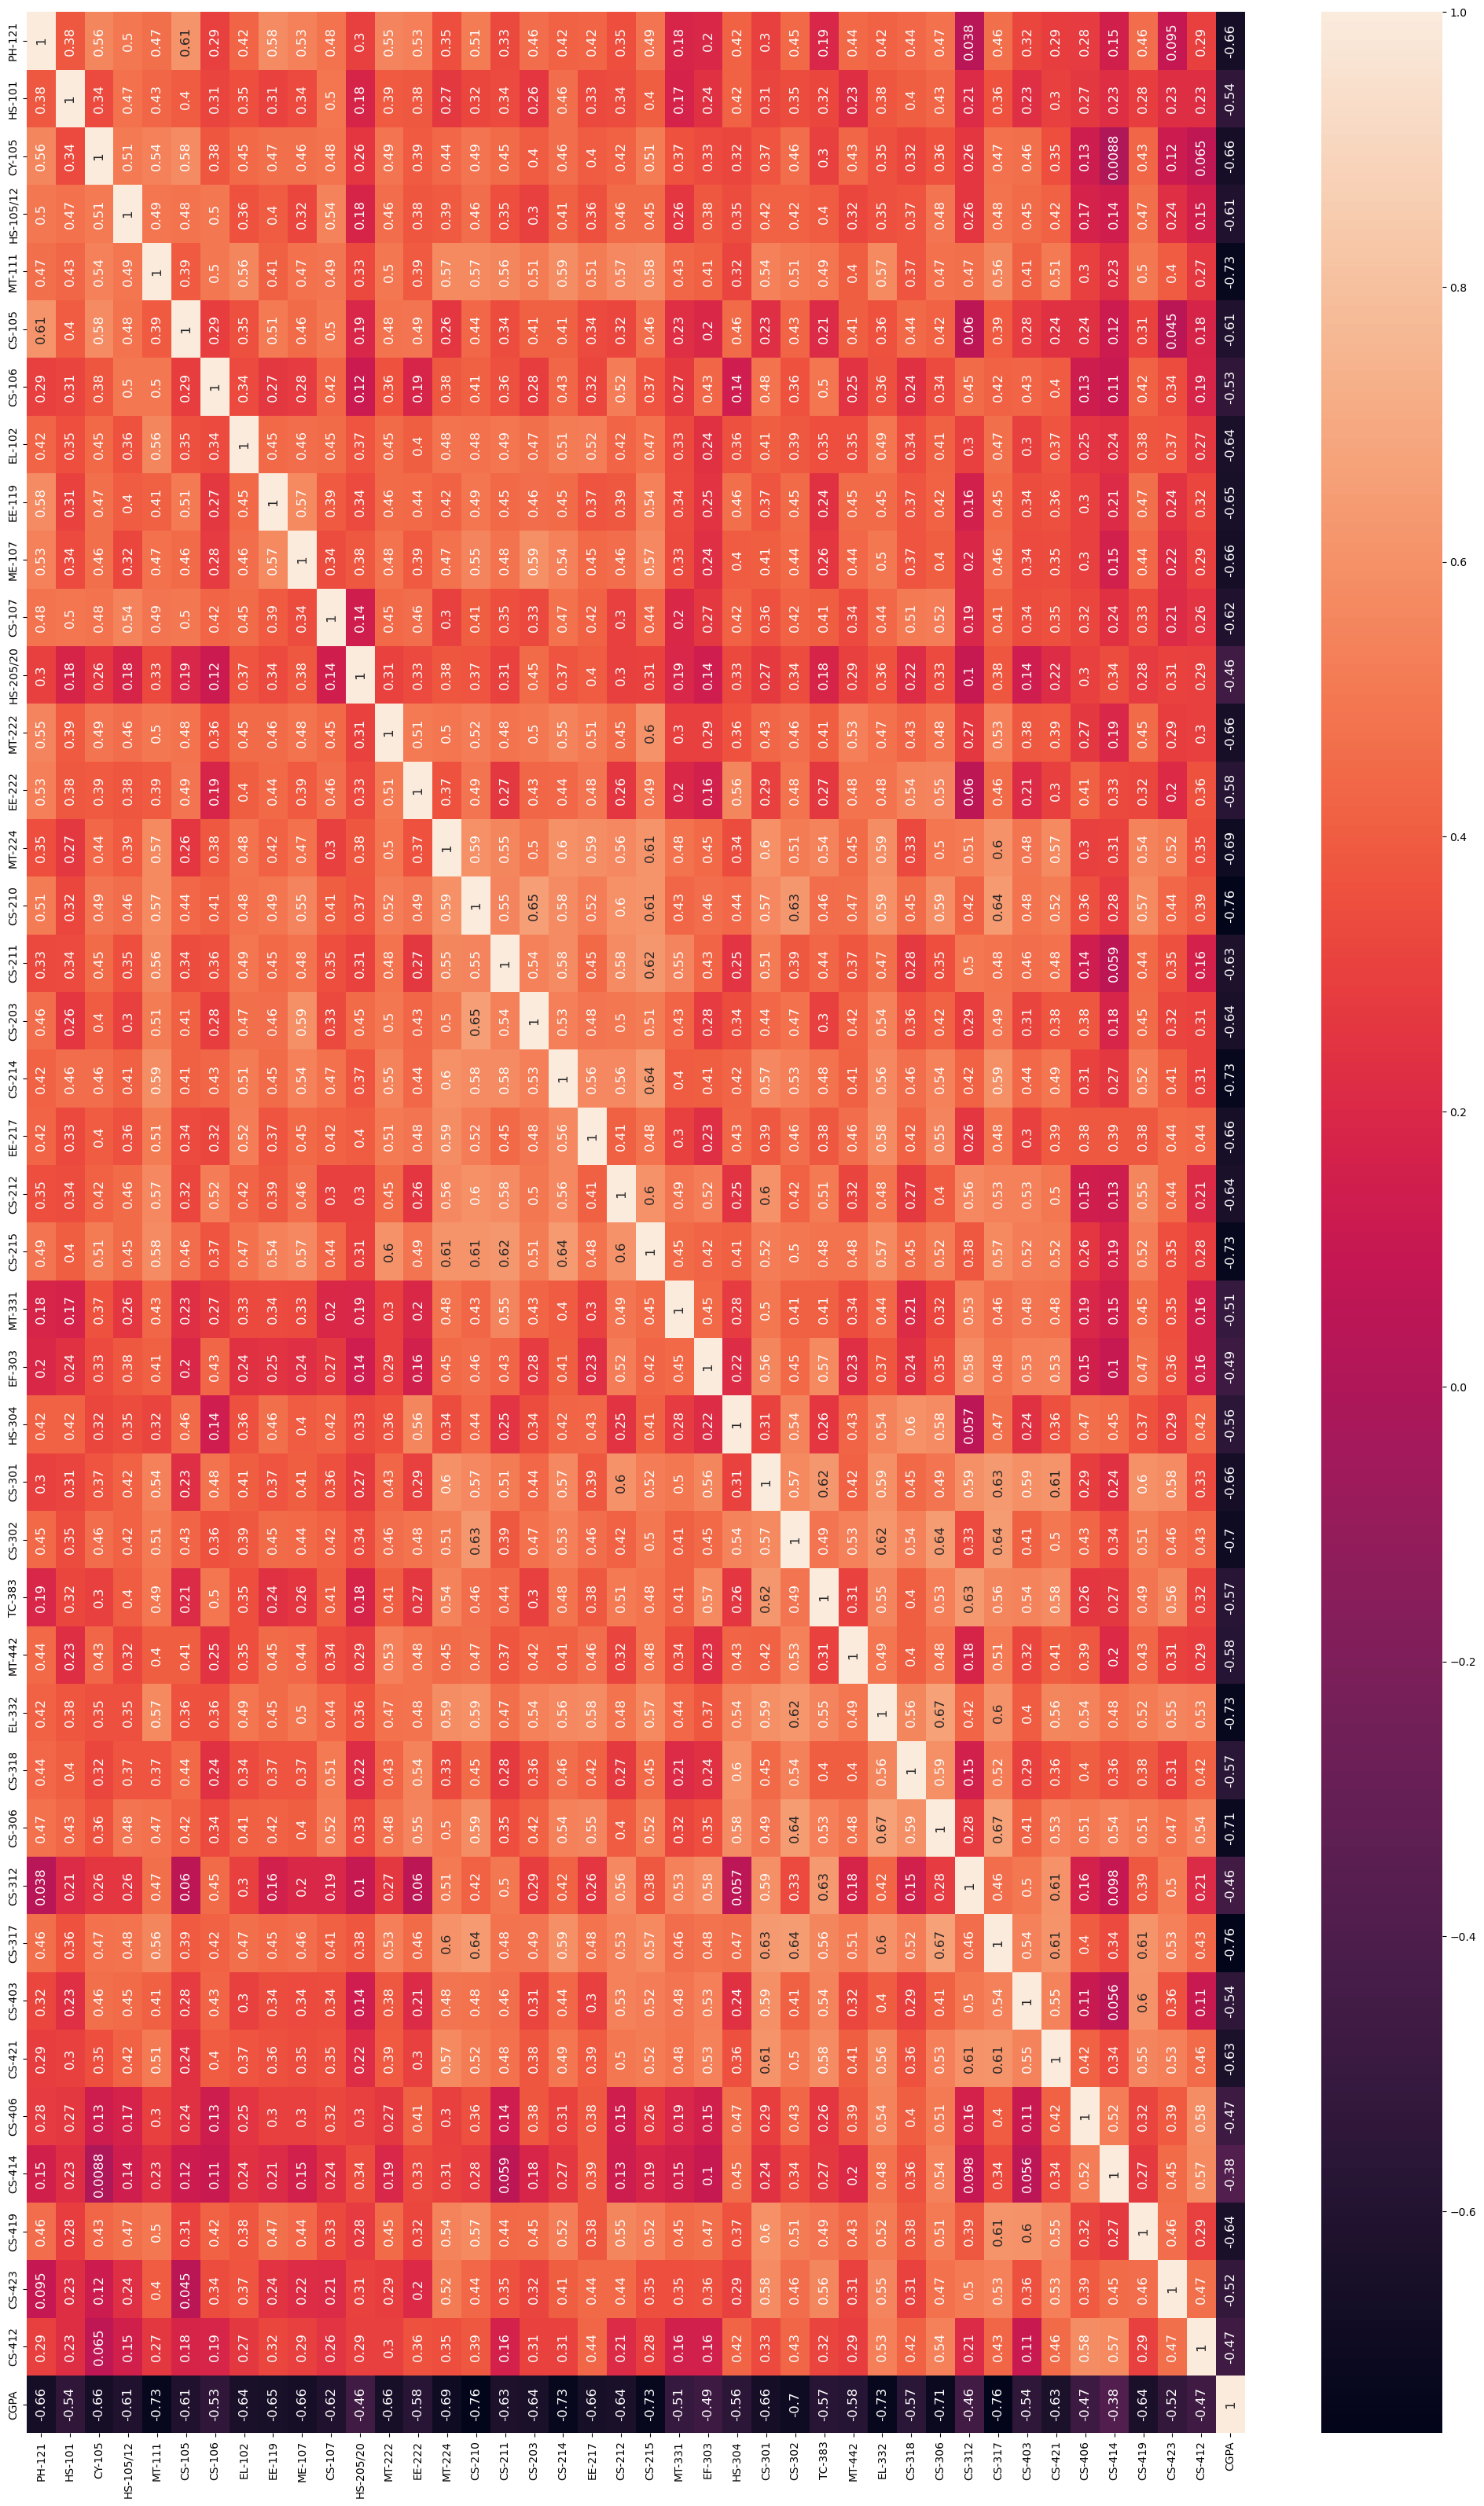

In [23]:
plt.figure(figsize = (25, 40))
sns.heatmap(data=corr, annot=True, annot_kws={"fontsize": 12, "rotation": 90})

## Observations:
- can see -ve correlation between features and target variable
- can see multicoorelation between features

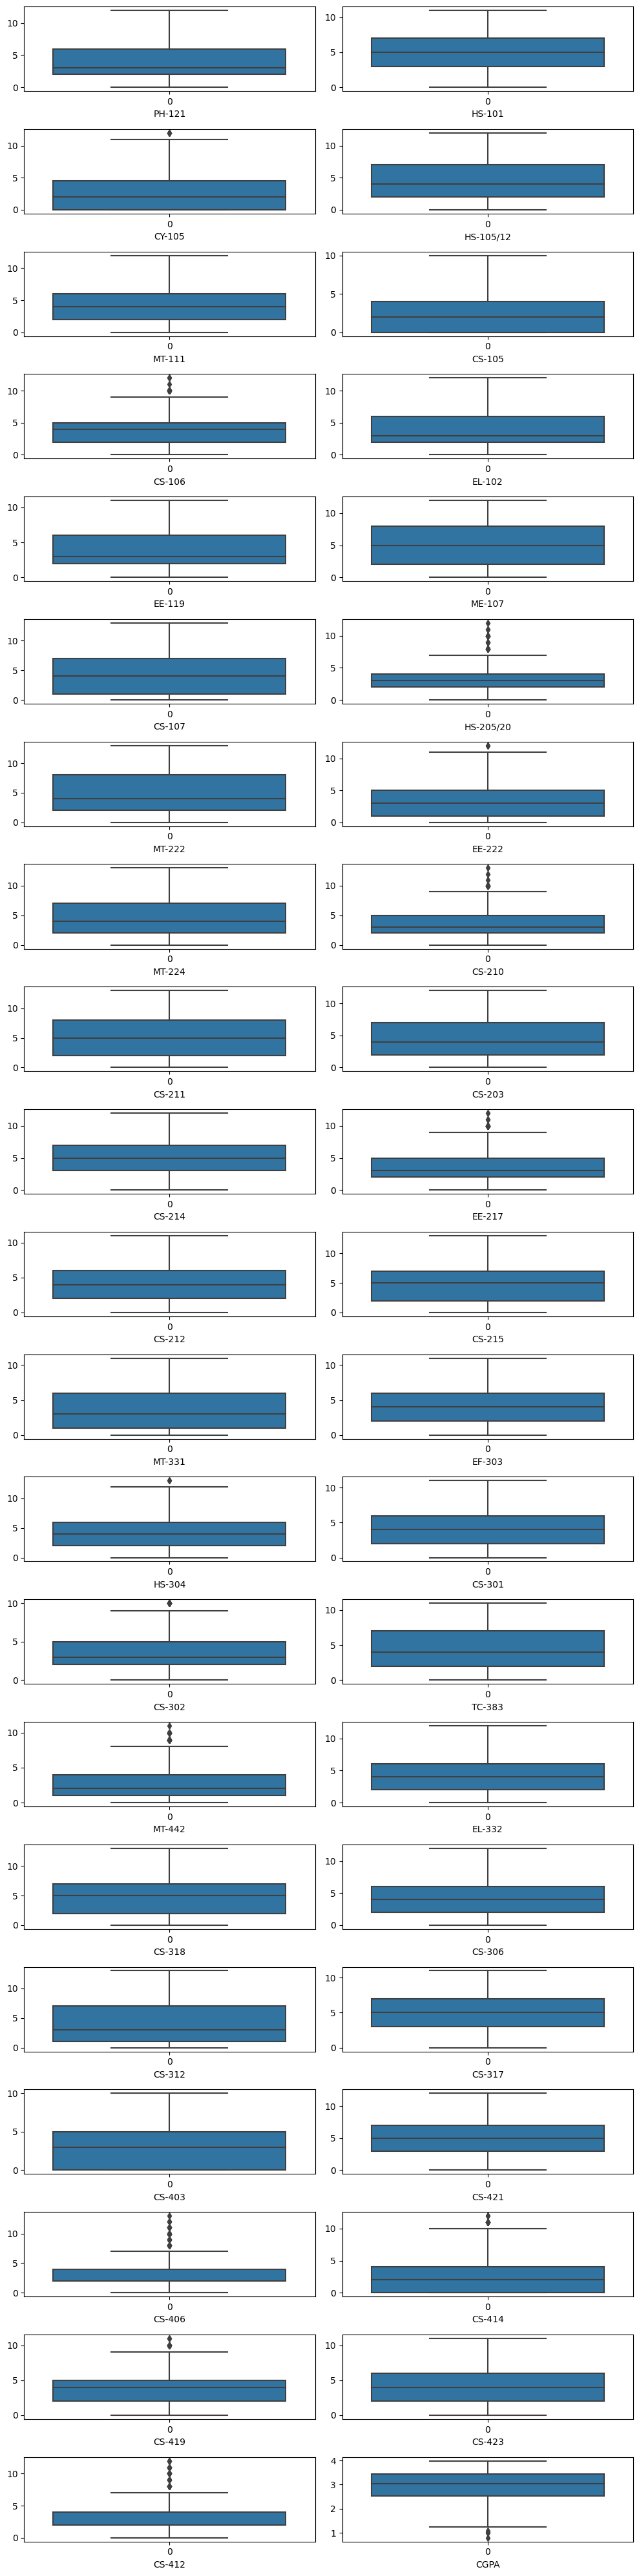

In [24]:
## Check outliers with boxplot
plt.figure(figsize = (10, 40))
number = 1
for col in df.columns:
    if number <= 42:
        plt.subplot(21, 2, number)
        sns.boxplot(data = df[col], orient = 'v')
        plt.xlabel(col)        
    number+=1
plt.tight_layout()

### Observations:
- Can see outliers in multiple columns, however all are the categorical features.
- Outliers can also be seen in target variable.
- Hence no outliers found, considering catgeorical data and target variable.

In [25]:
x = df.drop(columns = ['CGPA'])
y = df['CGPA']

### Features Scaling and using Standard Scalrization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x1 = pd.DataFrame(x_scaled, columns = x.columns)
x1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


In [27]:
x1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


In [28]:
x = x1

In [29]:
## Checking Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_func = variance_inflation_factor
vif = pd.DataFrame()
vif['Vif'] = [VIF_func(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,Vif,Features
0,2.827608,PH-121
1,1.771294,HS-101
2,2.514966,CY-105
3,2.293035,HS-105/12
4,2.638921,MT-111
5,2.366597,CS-105
6,1.927701,CS-106
7,1.968027,EL-102
8,2.190768,EE-119
9,2.294552,ME-107


- No multicorrelation found.

### Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [31]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1, y, test_size = 0.25, random_state = 300)

In [32]:
### Regression Models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [33]:
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR =  BaggingRegressor()
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()

In [34]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [36]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR)]
for model_name, model in models:
    model.fit(x_train, y_train) 

In [37]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  98.70013591871441

---------------Test Result---------------
R2 Score:   92.45224370473075
Mean Absolute Error:  0.11027755244755238
Mean Squared Error:  0.02601525266643354
Root Mean Squared Error:  0.16129244454230812


Model Name: ETR

---------------Train Result---------------
R2 score:  100.0

---------------Test Result---------------
R2 Score:   95.05906723347115
Mean Absolute Error:  0.08713895104895093
Mean Squared Error:  0.01703017549860135
Root Mean Squared Error:  0.13049971455371598


Model Name: GBR

---------------Train Result---------------
R2 score:  99.60347027979233

---------------Test Result---------------
R2 Score:   96.02720677816266
Mean Absolute Error:  0.08457770199379229
Mean Squared Error:  0.013693237488652386
Root Mean Squared Error:  0.11701810752465786


Model Name: ABR

---------------Train Result---------------
R2 score:  94.33328660719413

---------------Test Result---------------


### Cross Validation to check whether selected models are over fitting

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
for model_name, model in models:
    score = cross_val_score(model, x1, y, cv=5)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  92.45224370473075
Cross validation score =  90.97806189090744
Difference between R2 Score and Cross Validation Score =  0.014741818138233165


Model Name: ETR
R2 Score =  95.05906723347115
Cross validation score =  92.57530168500294
Difference between R2 Score and Cross Validation Score =  0.024837655484682086


Model Name: GBR
R2 Score =  96.02720677816266
Cross validation score =  93.05481334870913
Difference between R2 Score and Cross Validation Score =  0.029723934294535348


Model Name: ABR
R2 Score =  91.94489257136263
Cross validation score =  86.44093539426878
Difference between R2 Score and Cross Validation Score =  0.055039571770938434


Model Name: BR
R2 Score =  91.8856861037898
Cross validation score =  89.92754496357416
Difference between R2 Score and Cross Validation Score =  0.01958141140215619


Model Name: LR
R2 Score =  92.63834087342285
Cross validation score =  90.34513625626616
Difference between R2 Score and Cross Validation Score =  0

### Conclusion:
- RFR seems the best model considering the least difference between R2 score and Cross validation score

### Hyper parameter tuning for RFR Model

In [40]:
## RFR
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = { 'max_depth': [None, 5, 10],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2],
               'max_features': ['auto', 'sqrt']           
             }

In [42]:
gridsearch = GridSearchCV(RFR, param_grid, cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [43]:
gridsearch.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt')

In [44]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
Final_model = RandomForestRegressor(max_depth = 10,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_features = 'sqrt')
Final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt')

In [47]:
y_pred = Final_model.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_model.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  98.67920033772573

---------------Test Result---------------
R2 Score:   94.54060239830476
Mean Absolute Error:  0.08747589122343218
Mean Squared Error:  0.018817195794151732
Root Mean Squared Error:  0.13717578428480637




### Saving the final model

In [48]:
import pickle

In [49]:
pickle.dump(Final_model, open('Student grades prediction','wb'))

In [50]:
## Do the predication
loaded_model = pickle.load(open('Student grades prediction','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predicted
df['Original'] = original
df

,Predicted,Original
0,2.930260,3.074
1,2.753962,2.687
2,2.200546,2.188
3,3.604876,3.651
4,2.521944,2.488
...,...,...
138,2.744324,2.750
139,2.329432,1.923
140,2.932765,2.953
141,3.476230,3.443


In [51]:
print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   94.54060239830476
